In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path="/content/drive/MyDrive/Colab Notebooks/deep learning/credit card customer churn prediction/Churn_Modelling.csv"
df1=pd.read_csv(file_path)

In [3]:
df1.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df1.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [5]:
df1.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [7]:
df1['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [8]:
df1['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [9]:
print(df1['HasCrCard'].unique())
print(df1['IsActiveMember'].unique())
print(df1['NumOfProducts'].unique())

[1 0]
[1 0]
[1 3 2 4]


In [10]:
df=pd.get_dummies(df1,columns=['Geography','Gender'],dtype=int)

In [11]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


In [12]:
X=df.drop(columns=['Exited'])
y=df['Exited']

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=7)

In [14]:
numeric_columns=['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']
X_train[numeric_columns].head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
4989,629,40,9,0.00,1,106.67
4498,570,30,2,131406.56,1,47952.45
8876,556,46,3,131764.96,1,108500.66
670,624,48,3,122388.38,2,30020.09
9552,664,41,5,0.00,1,152054.33


In [15]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

scaler.fit(X_train[numeric_columns])
X_train_trf=X_train.copy()
X_test_trf=X_test.copy()
X_train_trf[numeric_columns]=scaler.transform(X_train[numeric_columns])
X_test_trf[numeric_columns]=scaler.transform(X_test[numeric_columns])

In [16]:
X_train_trf.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
4989,-0.224828,0.099845,1.377789,-1.234331,-0.906787,1,0,-1.736747,1,0,0,0,1
4498,-0.835785,-0.848578,-1.037266,0.874085,-0.906787,1,1,-0.905804,1,0,0,0,1
8876,-0.980758,0.668899,-0.692259,0.879836,-0.906787,1,1,0.145744,0,0,1,0,1
670,-0.276604,0.858584,-0.692259,0.729389,0.808987,0,0,-1.217237,0,1,0,1,0
9552,0.137604,0.194688,-0.002243,-1.234331,-0.906787,1,1,0.902146,1,0,0,1,0


### model

In [17]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Dropout


In [18]:
keras.utils.set_random_seed(7)

In [19]:
model=Sequential()

model.add(Dense(8,activation='relu',input_dim=X_train_trf.shape[1]))
# model.add(Dense(3,activation='relu',input_dim=X_train_trf.shape[1]))
model.add(Dense(1,activation='sigmoid'))

In [20]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 112       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 121 (484.00 Byte)
Trainable params: 121 (484.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
history = model.fit(X_train_trf,y_train,batch_size=32,epochs=60,verbose=1,validation_split=0.2)

Epoch 1/60
200/200 [==============================] - 4s 5ms/step - loss: 0.5383 - accuracy: 0.7781 - val_loss: 0.4861 - val_accuracy: 0.7925
Epoch 2/60
200/200 [==============================] - 1s 4ms/step - loss: 0.4355 - accuracy: 0.8064 - val_loss: 0.4457 - val_accuracy: 0.7956
Epoch 3/60
200/200 [==============================] - 1s 4ms/step - loss: 0.4057 - accuracy: 0.8147 - val_loss: 0.4265 - val_accuracy: 0.8094
Epoch 4/60
200/200 [==============================] - 1s 4ms/step - loss: 0.3907 - accuracy: 0.8306 - val_loss: 0.4123 - val_accuracy: 0.8175
Epoch 5/60
200/200 [==============================] - 1s 4ms/step - loss: 0.3798 - accuracy: 0.8369 - val_loss: 0.4027 - val_accuracy: 0.8288
Epoch 6/60
200/200 [==============================] - 1s 4ms/step - loss: 0.3717 - accuracy: 0.8436 - val_loss: 0.3929 - val_accuracy: 0.8350
Epoch 7/60
200/200 [==============================] - 1s 4ms/step - loss: 0.3656 - accuracy: 0.8453 - val_loss: 0.3852 - val_accuracy: 0.8431
Epoch 

In [22]:
y_pred=model.predict(X_test_trf)

y_pred1=np.where(y_pred > 0.50, 1, 0)[:, 0]
y_pred1

63/63 [==============================] - 0s 2ms/step


array([1, 0, 0, ..., 0, 0, 0])

In [23]:
from sklearn.metrics import accuracy_score, recall_score

acc=accuracy_score(y_test,y_pred1)
recall=recall_score(y_test,y_pred1)
print(f"accuracy is {acc * 100:.2f}%")
print(f"recall is {recall * 100:.2f}%")

accuracy is 85.65%
recall is 47.20%


In [24]:
import matplotlib.pyplot as plt


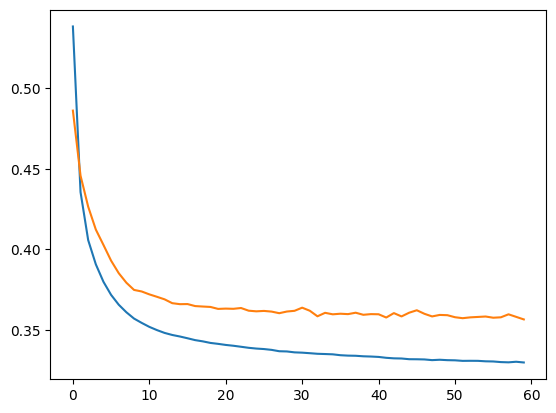

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

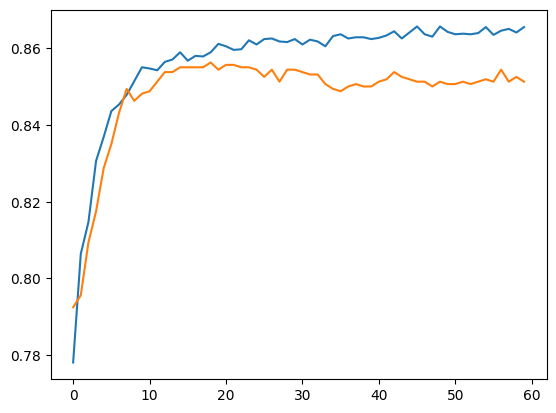

In [26]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

### changing class_weights and threshold

In [27]:
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights = dict(enumerate(class_weights))

print("Class weights:", class_weights)

Class weights: {0: 0.627549419516787, 1: 2.4600246002460024}


In [28]:
model=Sequential()

model.add(Dense(8,activation='relu',input_dim=X_train_trf.shape[1]))
# model.add(Dense(3,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [29]:
history = model.fit(X_train_trf,y_train,batch_size=32,epochs=60,verbose=1,validation_split=0.2,class_weight=class_weights)

Epoch 1/60
200/200 [==============================] - 1s 4ms/step - loss: 0.6445 - accuracy: 0.6217 - val_loss: 0.6389 - val_accuracy: 0.6594
Epoch 2/60
200/200 [==============================] - 1s 3ms/step - loss: 0.5905 - accuracy: 0.7063 - val_loss: 0.5820 - val_accuracy: 0.7250
Epoch 3/60
200/200 [==============================] - 1s 3ms/step - loss: 0.5616 - accuracy: 0.7458 - val_loss: 0.5666 - val_accuracy: 0.7356
Epoch 4/60
200/200 [==============================] - 1s 4ms/step - loss: 0.5428 - accuracy: 0.7472 - val_loss: 0.5485 - val_accuracy: 0.7400
Epoch 5/60
200/200 [==============================] - 1s 3ms/step - loss: 0.5270 - accuracy: 0.7533 - val_loss: 0.5171 - val_accuracy: 0.7588
Epoch 6/60
200/200 [==============================] - 1s 3ms/step - loss: 0.5139 - accuracy: 0.7617 - val_loss: 0.5143 - val_accuracy: 0.7563
Epoch 7/60
200/200 [==============================] - 1s 3ms/step - loss: 0.5028 - accuracy: 0.7634 - val_loss: 0.5044 - val_accuracy: 0.7581
Epoch 

In [30]:
y_pred_cw=model.predict(X_test_trf)
y_pred_cw

63/63 [==============================] - 0s 1ms/step


array([[0.92044276],
       [0.2746294 ],
       [0.06414492],
       ...,
       [0.38549772],
       [0.56419206],
       [0.2518766 ]], dtype=float32)

In [31]:
y_pred_cw1=np.where(y_pred_cw > 0.50, 1, 0)[:, 0]
y_pred_cw1

array([1, 0, 0, ..., 0, 1, 0])

In [32]:
from sklearn.metrics import accuracy_score, recall_score

acc=accuracy_score(y_test,y_pred_cw1)
recall=recall_score(y_test,y_pred_cw1)

print("====changing weights====")
print(f"accuracy is {acc * 100:.2f}%")
print(f"recall is {recall * 100:.2f}%")



====changing weights====
accuracy is 77.15%
recall is 76.89%


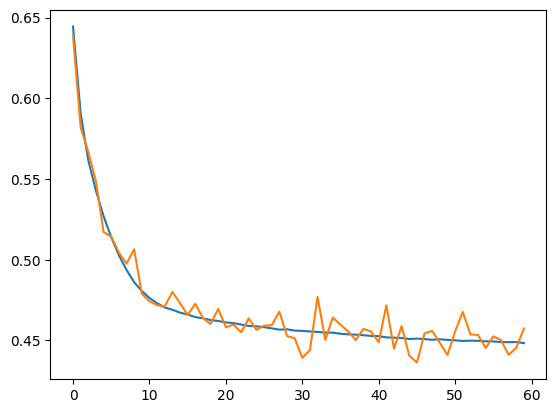

In [33]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

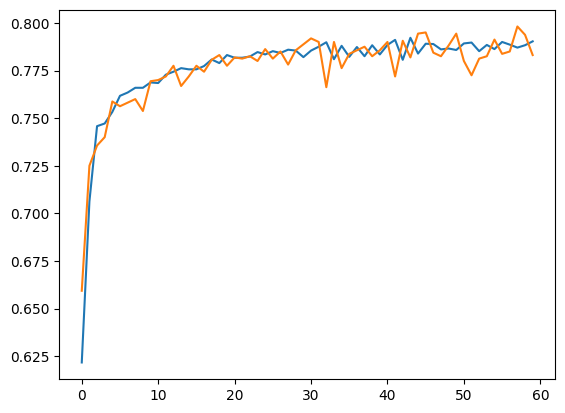

In [34]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

### hypertuning

In [35]:
pip install -U -q keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 4.0 MB/s eta 0:00:00


In [36]:
import kerastuner as kt

<ipython-input-36-5fd8096cdee5>:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner as kt


1. selecting appropriate optimizer
2. no of nodes in a layer
3. how to select no of layer
4. all in one model

#### finding best optimizier

In [37]:
def build_model(hp):
  model = Sequential()

  model.add(Dense(8,activation='relu',input_dim=X_train_trf.shape[1]))
  model.add(Dense(3,activation='relu'))
  model.add(Dense(1,activation='sigmoid'))
  optimizer = hp.Choice('optimizer', values=['adam', 'rmsprop', 'sgd','adadelta'])
  model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
  return model

tuner=kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    directory="mydir",
    project_name='optimizer')
tuner.search(X_train_trf,y_train,epochs=5,validation_data=(X_test_trf,y_test),class_weight=class_weights)

Trial 4 Complete [00h 00m 07s]
val_accuracy: 0.6464999914169312

Best val_accuracy So Far: 0.7574999928474426
Total elapsed time: 00h 00m 45s


In [38]:
tuner.get_best_hyperparameters()[0].values

{'optimizer': 'adam'}

extracing model from tuner

we dont have to make model again we can extract model with the best hyperparameter from tune

In [39]:
model=tuner.get_best_models(num_models=1)[0]
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 112       
                                                                 
 dense_1 (Dense)             (None, 3)                 27        
                                                                 
 dense_2 (Dense)             (None, 1)                 4         
                                                                 
Total params: 143 (572.00 Byte)
Trainable params: 143 (572.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# history = model.fit(X_train_trf,y_train,batch_size=32,epochs=60,verbose=1,validation_data=(X_test_trf,y_test),class_weight=class_weights)

#### no of neurons

In [40]:
# !rm -r mydir/

In [41]:
def build_model_neurons(hp):
  model = Sequential()

  units=hp.Int('units',min_value=32,max_value=512,step=32)
  model.add(Dense(units=units,activation='relu',input_dim=X_train_trf.shape[1]))
  model.add(Dense(1,activation='sigmoid'))

  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
  return model

tuner_neurons=kt.RandomSearch(
    build_model_neurons,
    objective='val_accuracy',
    max_trials=5,
    directory="mydir",
    project_name='neurons')
tuner_neurons.search(X_train_trf,y_train,epochs=5,validation_data=(X_test_trf,y_test),class_weight=class_weights)

Trial 5 Complete [00h 00m 11s]
val_accuracy: 0.7745000123977661

Best val_accuracy So Far: 0.7754999995231628
Total elapsed time: 00h 00m 58s


In [42]:
tuner_neurons.get_best_hyperparameters()[0].values

{'units': 224}

In [43]:
model=tuner_neurons.get_best_models(num_models=1)[0]
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 224)               3136      
                                                                 
 dense_1 (Dense)             (None, 1)                 225       
                                                                 
Total params: 3361 (13.13 KB)
Trainable params: 3361 (13.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# history = model.fit(X_train_trf,y_train,batch_size=32,epochs=60,verbose=1,validation_data=(X_test_trf,y_test),class_weight=class_weights)

#### no of nodes

In [44]:
# !rm -r mydir/

In [45]:
def build_model_nodes(hp):
  model=Sequential()
  model.add(Dense(512,activation='relu',input_dim=X_train_trf.shape[1]))

  for i in range(hp.Int('num_layers',min_value=1,max_value=5)):
    model.add(Dense(512,activation='relu'))

  model.add(Dense(1,activation='sigmoid'))

  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
  return model

tuner_nodes=kt.RandomSearch(
    build_model_nodes,
    objective='val_accuracy',
    max_trials=5,
    directory="mydir",
    project_name='nodes')
tuner_nodes.search(X_train_trf,y_train,epochs=5,validation_data=(X_test_trf,y_test),class_weight=class_weights)

Trial 5 Complete [00h 00m 14s]
val_accuracy: 0.8080000281333923

Best val_accuracy So Far: 0.8080000281333923
Total elapsed time: 00h 00m 56s


In [46]:
print(tuner_nodes.get_best_hyperparameters()[0].values)
model=tuner_nodes.get_best_models(num_models=1)[0]
model.summary()

{'num_layers': 1}
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               7168      
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 1)                 513       
                                                                 
Total params: 270337 (1.03 MB)
Trainable params: 270337 (1.03 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# history = model.fit(X_train_trf,y_train,batch_size=32,epochs=60,verbose=1,validation_data=(X_test_trf,y_test),class_weight=class_weights)

#### finding all hyperparameters

In [90]:
ls

drive/  sample_data/


In [91]:
# !rm -r mydir/

In [92]:
def build_model_all(hp):
  model=Sequential()

  counter=0
  for i in range(hp.Int('num_layers',min_value=1,max_value=10)):

    if counter==0:
      model.add(Dense(
          hp.Int('units'+str(i),min_value=32,max_value=512,step=32),
          activation=hp.Choice('activation'+str(i),values=['relu','tanh','sigmoid']),
          input_dim=X_train_trf.shape[1]
      ))
      # model.add(Dropout(hp.Choice('dropout'+str(i),values=[0.0,0.1,0.2,0.3,0.4,0.5])))

    else:
      model.add(Dense(
          hp.Int('units'+str(i),min_value=32,max_value=512,step=32),
          activation=hp.Choice('activation'+str(i),values=['relu','tanh','sigmoid']),
      ))
      model.add(Dropout(hp.Choice('dropout'+str(i),values=[0.0,0.1,0.2,0.3,0.4,0.5])))

    counter+=1
  model.add(Dense(1,activation='sigmoid'))

  model.compile(
      optimizer=hp.Choice('optimizer',values=['adam','rmsprop','sgd','adadelta']),
      loss='binary_crossentropy', metrics=['accuracy']
      )
  return model

tuner_all=kt.RandomSearch(
    build_model_all,
    objective='val_accuracy',
    max_trials=5,
    directory="mydir",
    project_name='all')
tuner_all.search(X_train_trf,y_train,epochs=5,validation_data=(X_test_trf,y_test),class_weight=class_weights)

Trial 5 Complete [00h 00m 08s]
val_accuracy: 0.7944999933242798

Best val_accuracy So Far: 0.7944999933242798
Total elapsed time: 00h 01m 01s


In [93]:
print(tuner_all.get_best_hyperparameters()[0].values)
model=tuner_all.get_best_models(num_models=1)[0]
model.summary()

{'num_layers': 6, 'units0': 448, 'activation0': 'sigmoid', 'optimizer': 'rmsprop', 'units1': 224, 'activation1': 'sigmoid', 'dropout1': 0.1, 'units2': 224, 'activation2': 'relu', 'dropout2': 0.3, 'units3': 480, 'activation3': 'tanh', 'dropout3': 0.5, 'units4': 288, 'activation4': 'tanh', 'dropout4': 0.2, 'units5': 32, 'activation5': 'relu', 'dropout5': 0.0}
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 448)               6272      
                                                                 
 dense_1 (Dense)             (None, 224)               100576    
                                                                 
 dropout (Dropout)           (None, 224)               0         
                                                                 
 dense_2 (Dense)             (None, 224)               50400     
                          

In [94]:
history = model.fit(X_train_trf,y_train,batch_size=32,epochs=60,verbose=1,validation_data=(X_test_trf,y_test),class_weight=class_weights)

Epoch 1/60
250/250 [==============================] - 3s 7ms/step - loss: 0.6963 - accuracy: 0.5341 - val_loss: 0.6554 - val_accuracy: 0.7945
Epoch 2/60
250/250 [==============================] - 2s 7ms/step - loss: 0.6973 - accuracy: 0.3775 - val_loss: 0.7105 - val_accuracy: 0.2055
Epoch 3/60
250/250 [==============================] - 1s 6ms/step - loss: 0.6948 - accuracy: 0.3173 - val_loss: 0.7094 - val_accuracy: 0.2055
Epoch 4/60
250/250 [==============================] - 1s 5ms/step - loss: 0.6959 - accuracy: 0.3740 - val_loss: 0.7104 - val_accuracy: 0.2055
Epoch 5/60
250/250 [==============================] - 1s 5ms/step - loss: 0.6974 - accuracy: 0.4893 - val_loss: 0.7194 - val_accuracy: 0.2055
Epoch 6/60
250/250 [==============================] - 1s 5ms/step - loss: 0.6965 - accuracy: 0.4404 - val_loss: 0.7240 - val_accuracy: 0.2055
Epoch 7/60
250/250 [==============================] - 1s 5ms/step - loss: 0.6961 - accuracy: 0.3983 - val_loss: 0.7202 - val_accuracy: 0.2055
Epoch 

In [95]:
y_pred=model.predict(X_test_trf)

y_pred1=np.where(y_pred > 0.50, 1, 0)[:, 0]
y_pred1

63/63 [==============================] - 0s 2ms/step


array([1, 0, 0, ..., 0, 1, 0])

In [96]:
from sklearn.metrics import accuracy_score, recall_score

acc=accuracy_score(y_test,y_pred1)
recall=recall_score(y_test,y_pred1)
print(f"accuracy is {acc * 100:.2f}%")
print(f"recall is {recall * 100:.2f}%")

accuracy is 76.60%
recall is 75.43%


In [97]:
import matplotlib.pyplot as plt


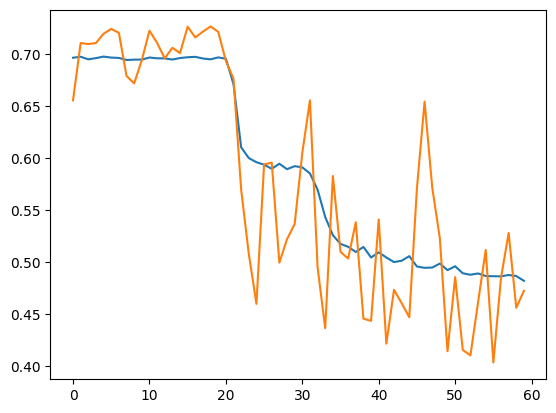

In [98]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

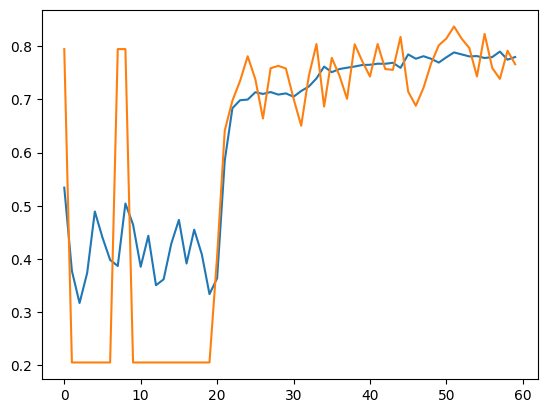

In [99]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [100]:
!rm -r mydir/